In [1]:
### Import libraries

%matplotlib inline
import xarray as xr
import cmocean as cmo

import numpy as np
import numpy.ma as ma

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import cartopy
import cartopy.crs as ccrs

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# General settings and preparation

In [2]:
### Define functions for preparation of data and plotting

def divide_longitude(lons, lats, var):
    '''
    Split data into sections east and west of the prime meridian.
    
    Parameters:
    ---
    lons (array): longitudes
    lats (array): latitudes
    var (array): variable data associated with the latitudes and longitudes
        
    Returns:
    ---
    lons_greater (array): longitudes east of the prime meridian (0 to 180°)
    lons_lesser (array): longitudes west of the prime meridian (-180 to 0°)
    lats_greater (array): latitudes corresponding to lons_greater
    lats_lesser (array): latitudes corresponding to lons_lesser
    var_greater (array): variable data corresponding to lons_greater
    var_lesser (array): variable data corresponding to lons_lesser
    '''
    
    # Mask based on longitudes
    lons_greater = ma.masked_greater(lons, -0.01)
    lons_lesser = ma.masked_less(lons, 0.)
    
    lats_greater = ma.MaskedArray(lats, mask=lons_greater.mask)
    lats_lesser = ma.MaskedArray(lats, mask=lons_lesser.mask)
    
    var_greater = ma.MaskedArray(var, mask=lons_greater.mask)
    var_lesser = ma.MaskedArray(var, mask=lons_lesser.mask)
    
    return lons_greater, lons_lesser, lats_greater, lats_lesser, var_greater, var_lesser

In [3]:
### Settings circular boundary South Polar Stereo projection plot
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [4]:
### Base path to files
base_path = '/nethome/5867800/'

In [5]:
### Locations

# ODP Site 696
x696_le, y696_le = -57., -67.5              # late Eocene coordinates (determined visually) [°]

## Release locations
# Forwards [°]
lons_fw = np.array([-55., -50., -45., -40., -35.,
                    -30., -25., -20., -15., -10.,
                     -5.,   0.,   5.,  10.,  15.,
                     20.,  25.,  30.,  35.,  40.,
                     45.,  50.,  55.,  60., -57.82330253,
                    -59.25, -60.08662877, -60.01036191, -58.82106809])
lats_fw = np.array([-77.99537227, -78.45787684, -79.17977465, -79.75459498, -79.99027112,
                    -80.07689735, -79.9997914 , -80.12097168, -79.24559138, -78.39033646,
                    -77.33178711, -76.13251966, -75.17986379, -74.68456009, -73.6896764 ,
                    -73.53134648, -72.9724492 , -72.3117251 , -72.29006817, -72.16268516,
                    -70.86573029, -68.58359528, -68.58359528, -66.59729004, -77.,
                    -75.        , -73.        , -71.        , -69.        ])

# Backwards [°]
lons_bw = np.array([-57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                    -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                    -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                    -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221,
                    -57.04998779, -57.0249939, -57., -56.9750061, -56.95001221])
lats_bw = np.array([-67.5270462, -67.5270462, -67.5270462, -67.5270462, -67.5270462,
                    -67.5164814, -67.5164814, -67.5164814, -67.5164814, -67.5164814,
                    -67.5059166, -67.5059166, -67.5059166, -67.5059166, -67.5059166,
                    -67.49535179, -67.49535179, -67.49535179, -67.49535179, -67.49535179,
                    -67.48478699, -67.48478699, -67.48478699, -67.48478699, -67.48478699])

In [6]:
### Prepare bathymetric data

# Load data Nooteboom et al. (2022)
topo = xr.open_dataset(base_path + 'grid/adapted_bathymetry.nc')

# Load latitudes, longitudes and bathymetry
latst = topo.variables['T_LAT_2D'][:,:]
lonst = topo.variables['T_LON_2D'][:,:]
latsu = topo.variables['U_LAT_2D'][:,:]
lonsu = topo.variables['U_LON_2D'][:,:]
bathy = topo.variables['Bathymetry'][:,:]

# Determine release locations

## Forwards

Select 500m depth contour

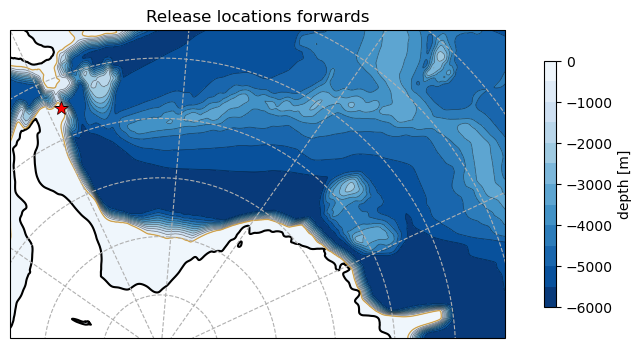

In [7]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(10,4))
ax.set_title(f'Release locations forwards')
ax.set_extent([-60,40,-85,-60])
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
lonsg, lonsl, latsg, latsl, varg, varl = divide_longitude(lonst, latst, bathy)
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Bathymetry
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label='depth [m]')
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())

# Contour 500m depth
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())

# ODP Site 696
ax.plot(x696_le, y696_le, color='r', marker='*', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

In [8]:
### Select contours
p1 = cs1.collections[0].get_paths()[0]
v1 = p1.vertices
x1 = v1[:,0]
y1 = v1[:,1]

p2 = cs2.collections[0].get_paths()[0]
v2 = p2.vertices
x2 = v2[:,0]
y2 = v2[:,1]

In [9]:
### Concatenate parts west and east of meridian
xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))

Plot contour on map to compare to present-day

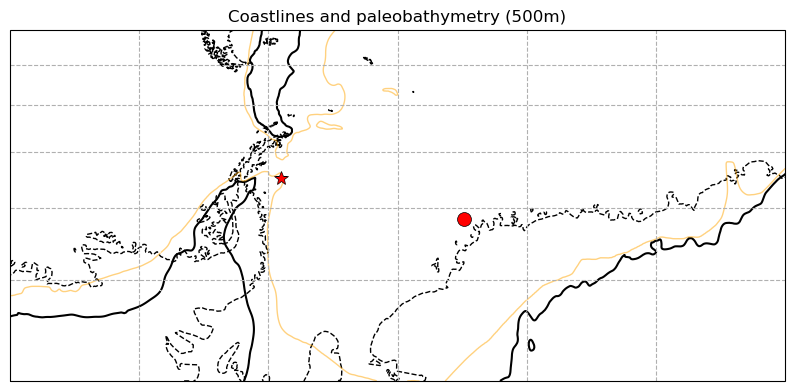

In [10]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator()}, figsize=(10,8))
ax.set_title(f'Coastlines and paleobathymetry (500m)')
ax.set_extent([-120,60,-90,-50])
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.coastlines(linestyle='--')

# Contour 500m depth
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())

# ODP Site 696
ax.plot(x696_le, y696_le, color='r', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

# ODP Site 693
plt.plot(-14.5735, -70.831533, color='r', marker='o', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

Find present day 'range' of Carter region and translate to paleo: load GEBCO bathymetry data from present-day and make into meshgrid

In [11]:
### Load GEBCO data and create meshgrid
geb   = xr.open_dataset(base_path + 'grid/gebco_2022_long.nc')
glat  = geb.variables['lat'][:]
glon  = geb.variables['lon'][:]
gbath = geb.variables['elevation'][:,:]

glons, glats = np.meshgrid(glon, glat)

Plot with approximate coastal regions.

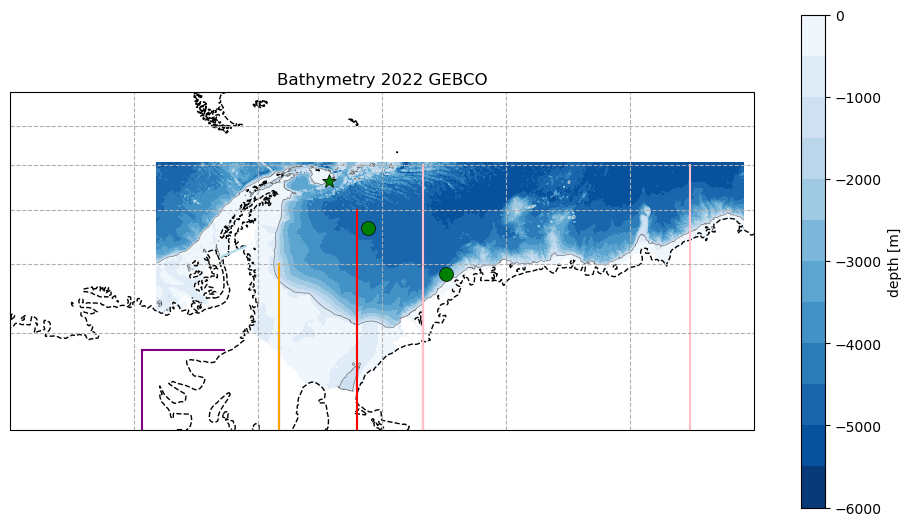

In [12]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator()}, figsize=(12,8))
ax.set_title(f'Bathymetry 2022 GEBCO')
ax.set_extent([-120,60,-90,-50])
ax.gridlines(linestyle='--')

### Plot main figure
# Bathymetry
lonsgg, lonslg, latsgg, latslg, vargg, varlg = divide_longitude(glons, glats, gbath)
im = ax.contourf(lonsgg, latsgg, vargg, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
im = ax.contourf(lonslg, latslg, varlg, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label='depth [m]')
ax.contour(lonsgg, latsgg, vargg, levels=[-1000], linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonslg, latslg, varlg, levels=[-1000], linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())

# Coastlines
ax.coastlines(linestyle='--')

## ODP Sites
# ODP 696
plt.plot(-42.933267, -61.849317, color='g', marker='*', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())
# ODP 694
plt.plot(-33.4465, -66.84715, color='g', marker='o', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())
# ODP 693
plt.plot(-14.57435, -70.831467, color='g', marker='o', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())

## Coastal regions
# North Grahamland base
plt.plot([-68.822222, -62.933333], [-69.401111, -68.483333], color='lightblue', transform=ccrs.PlateCarree())

# Ellsworth mountain borders
plt.plot([-88.14, -68.14], [-76.05, -76.05], color='purple', transform=ccrs.PlateCarree())
plt.plot([-88.14, -88.14], [-90, -76.05], color='purple', transform=ccrs.PlateCarree())
plt.plot([-55., -55.], [-90, -75], color='purple', transform=ccrs.PlateCarree())

# Filchner Ice Shelf borders
plt.plot([-55., -55.], [-90, -70], color='orange', transform=ccrs.PlateCarree())
plt.plot([-36., -36.], [-90, -70], color='orange', transform=ccrs.PlateCarree())

# Coats Land borders
plt.plot([-36., -36.], [-90, -65], color='red', transform=ccrs.PlateCarree())
plt.plot([-20., -20.], [-90, -65], color='red', transform=ccrs.PlateCarree())

# Dronning Maud Land borders
plt.plot([-20., -20.], [-90, -60], color='pink', transform=ccrs.PlateCarree())
plt.plot([44.633333, 44.633333], [-90, -60], color='pink', transform=ccrs.PlateCarree())

plt.show()

Select approximate reach of coastal regions

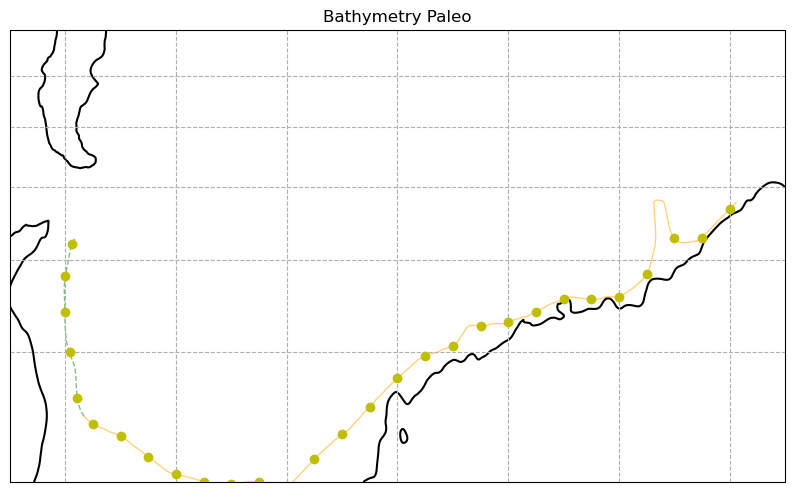

In [13]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Mercator(central_longitude=-20)}, figsize=(10,8))
ax.set_title(f'Bathymetry Paleo')
ax.set_extent([-70,70,-90,-50], ccrs.PlateCarree())
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Release locations
ax.scatter(lons_fw, lats_fw, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Contour 500m depth
ax.plot(xs[:725], ys[:725], linewidth=1, alpha=0.5, color='orange', linestyle='-', transform=ccrs.PlateCarree())
ax.plot(xs[-1000:], ys[-1000:], linewidth=1, alpha=0.5, color='orange', linestyle='-', transform=ccrs.PlateCarree())
ax.plot(xs[725:1000], ys[725:1000], linewidth=1, alpha=0.5, color='green', linestyle='--', transform=ccrs.PlateCarree())

plt.show()

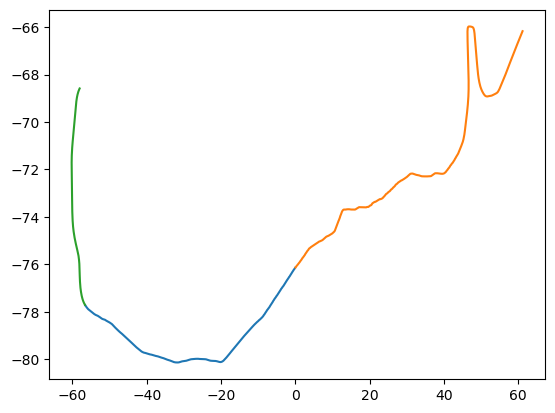

In [14]:
plt.plot(xs[:725], ys[:725])
plt.plot(xs[-1000:], ys[-1000:])
plt.plot(xs[725:1000], ys[725:1000]);

Select points at equal horizontal distance ...

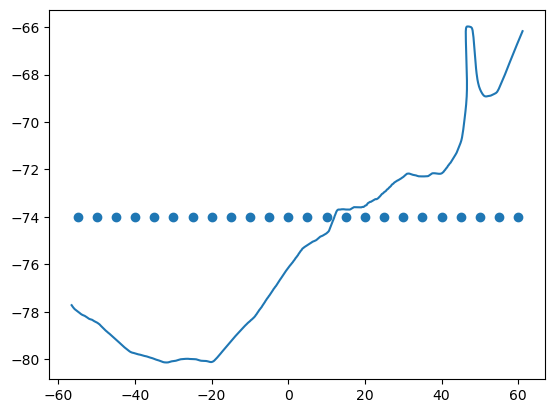

In [15]:
xcoast = np.concatenate((xs[-1000:], xs[:725]))
ycoast = np.concatenate((ys[-1000:], ys[:725]))

plt.plot(xcoast, ycoast)
plt.scatter(np.arange(-55, 60+5, 5), np.ones(len(np.arange(-55, 60+5, 5)))*-74.);

... and vertical distance

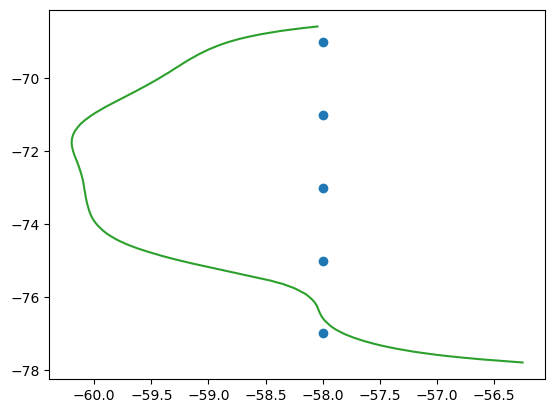

In [16]:
xcoastv = xs[720:1000]
ycoastv = ys[720:1000]

plt.plot(xcoastv, ycoastv, c='tab:green')
plt.scatter(np.ones(len(np.arange(-77, -67.5-.5, 2)))*-58., np.arange(-77, -67.5-.5, 2));

Interpolate to find nearest coordinates on the 500 m contour with roughtly equal spacing

In [17]:
### Defined points
# Longitude
xtest = np.arange(-55, 60+5, 5) # 24 samples
# Latitude
ytestv = np.arange(-77, -67.5-.5, 2) # 5 samples

xtest, ytestv

(array([-55, -50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,
         10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60]),
 array([-77., -75., -73., -71., -69.]))

In [18]:
### Define function
def find_nearest(array, value):
    ''' Find nearest coordinate on contour '''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [19]:
# Find nearest points ...
ytest = np.zeros(len(xtest))
for j, xc in enumerate(xtest):
    i = find_nearest(xcoast, xc)
    ytest[j] = ycoast[i]

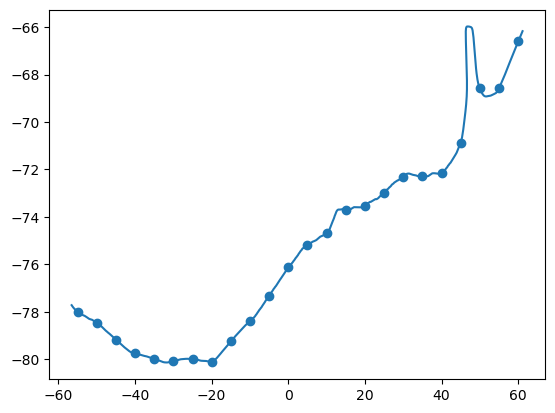

In [20]:
# ... and plot
plt.plot(xcoast, ycoast)
plt.scatter(xtest, ytest);

In [21]:
# Find nearest points ...
xtestv = np.zeros(len(ytestv))
for j, yc in enumerate(ytestv):
    i = find_nearest(ycoastv, yc)
    xtestv[j] = xcoastv[i]

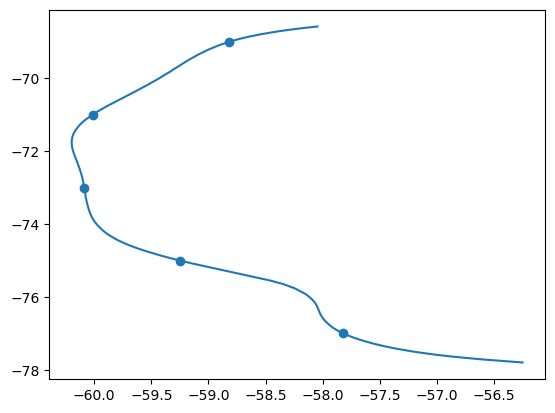

In [22]:
# ... and plot
plt.plot(xcoastv, ycoastv)
plt.scatter(xtestv, ytestv);

Plot all forward release locations:

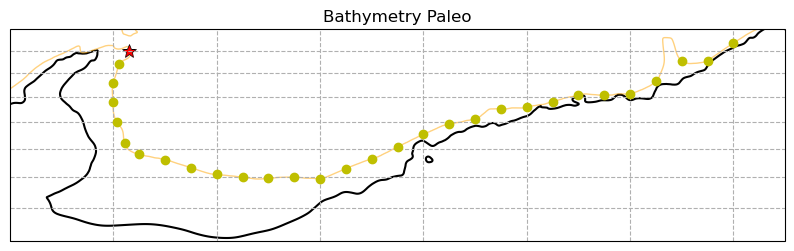

In [23]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Miller(central_longitude=-20)}, figsize=(10,8))
ax.set_title(f'Bathymetry Paleo')
ax.set_extent([-80,70,-85,-65], ccrs.PlateCarree())
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

## Release locations
ax.scatter( xtest,  ytest, transform=ccrs.PlateCarree(), color='y', zorder=10)
ax.scatter(xtestv, ytestv, transform=ccrs.PlateCarree(), color='y', zorder=10)

# Contour 500m depth
cs1 = ax.contour(lonsg, latsg, varg, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())
cs2 = ax.contour(lonsl, latsl, varl, levels=[-500], linewidths=1, alpha=0.5, colors='orange', linestyles='-', transform=ccrs.PlateCarree())

# ODP Site 696
ax.plot(x696_le, y696_le, color='r', marker='*', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

In [24]:
### Define arrays
xcoor = np.concatenate((xtest, xtestv))
ycoor = np.concatenate((ytest, ytestv))
xcoor, ycoor, len(xcoor)

(array([-55.        , -50.        , -45.        , -40.        ,
        -35.        , -30.        , -25.        , -20.        ,
        -15.        , -10.        ,  -5.        ,   0.        ,
          5.        ,  10.        ,  15.        ,  20.        ,
         25.        ,  30.        ,  35.        ,  40.        ,
         45.        ,  50.        ,  55.        ,  60.        ,
        -57.82330253, -59.25      , -60.08662877, -60.01036191,
        -58.82106809]),
 array([-77.99537227, -78.45787684, -79.17977465, -79.75459498,
        -79.99027112, -80.07689735, -79.9997914 , -80.12097168,
        -79.24559138, -78.39033646, -77.33178711, -76.13251966,
        -75.17986379, -74.68456009, -73.6896764 , -73.53134648,
        -72.9724492 , -72.3117251 , -72.29006817, -72.16268516,
        -70.86573029, -68.58359528, -68.58359528, -66.59729004,
        -77.        , -75.        , -73.        , -71.        ,
        -69.        ]),
 29)

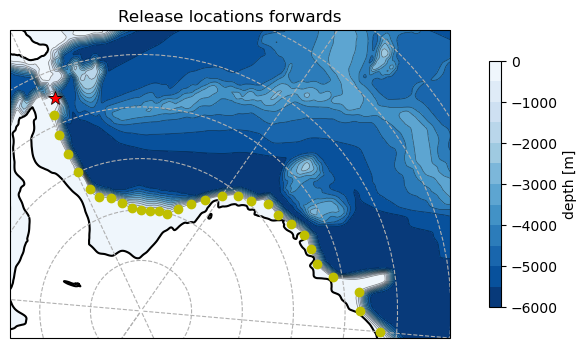

In [25]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(10,4))
ax.set_title(f'Release locations forwards')
ax.set_extent([-60,60,-90,-60])
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Bathymetry
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label='depth [m]')
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())

# Release locations
ax.scatter(xcoor, ycoor, transform=ccrs.PlateCarree(), color='y', zorder=10)

# ODP Site 696
ax.plot(x696_le, y696_le, color='r', marker='*', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

## Backwards

Select grid points around site

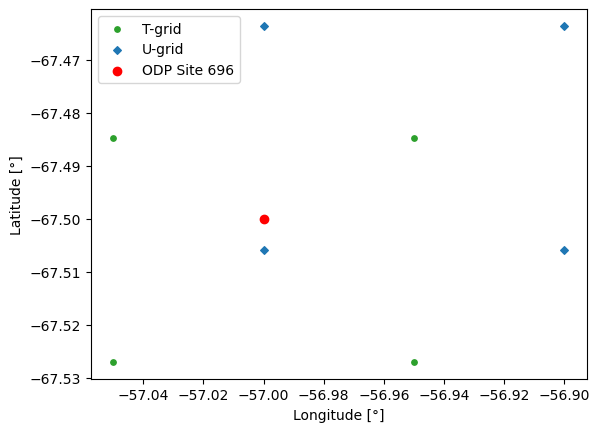

In [26]:
plt.scatter(lonst[409:411,279:281], latst[409:411,279:281], color='tab:green', marker='o', s=15, label='T-grid')
plt.scatter(lonsu[409:411,279:281], latsu[409:411,279:281], color='tab:blue' , marker='D', s=15, label='U-grid')
plt.scatter(x696_le, y696_le, color='r', label='ODP Site 696')
plt.legend()
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]');

Define 25 points in five by five around ODP Site 696

In [27]:
### Longitude
np.linspace(lonst[409,279].data, lonst[410,280].data, 5)

array([-57.04998779, -57.0249939 , -57.        , -56.9750061 ,
       -56.95001221])

In [28]:
### Latitude
np.linspace(latst[409,279].data, latst[410,280].data, 5)

array([-67.5270462 , -67.5164814 , -67.5059166 , -67.49535179,
       -67.48478699])

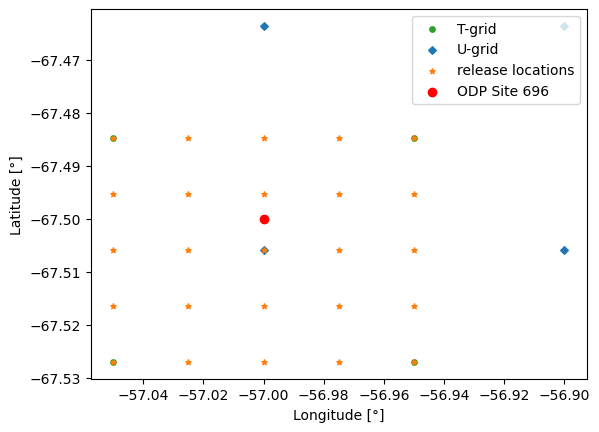

In [29]:
### Plot 25 backwards points
plt.scatter(lonst[409:411,279:281], latst[409:411,279:281], color='tab:green', marker='o', s=15, label='T-grid')
plt.scatter(lonsu[409:411,279:281], latsu[409:411,279:281], color='tab:blue',  marker='D', s=15, label='U-grid')
plt.scatter(lons_bw, lats_bw, color='tab:orange', marker='*', s=15, label='release locations')
plt.scatter(x696_le, y696_le, color='r', label='ODP Site 696')
plt.legend()
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]');

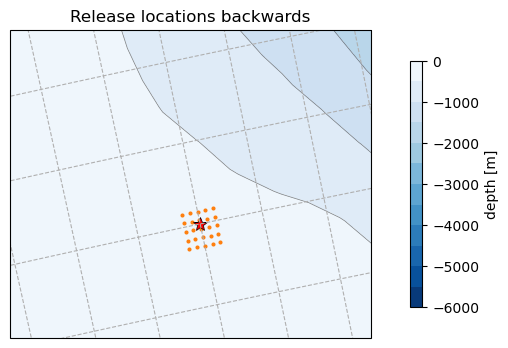

In [30]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-45)}, figsize=(10,4))
ax.set_title(f'Release locations backwards')
ax.set_extent([-57.5,-56.5,-67.6,-67.3])
ax.gridlines(linestyle='--')

### Plot main figure
# Coastlines
ax.contour(lonsg, latsg, varg, levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl, latsl, varl, levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Bathymetry
im = ax.contourf(lonsg, latsg, varg, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
im = ax.contourf(lonsl, latsl, varl, levels=range(-6000,1,500), cmap='Blues_r', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, shrink=0.8, label='depth [m]')
ax.contour(lonsg, latsg, varg, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl, latsl, varl, levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())

# Release locations
plt.scatter(lons_bw, lats_bw, color='tab:orange', marker='.', s=15, transform=ccrs.PlateCarree())

# ODP Site 696
ax.plot(x696_le, y696_le, color='r', marker='*', markersize=10, markeredgecolor='k', markeredgewidth=.5, transform=ccrs.PlateCarree())

plt.show()

## Overview release locations

Show overview of defined forwards and backward release locations.

/nethome/5867800/.conda/envs/py3_parcels/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


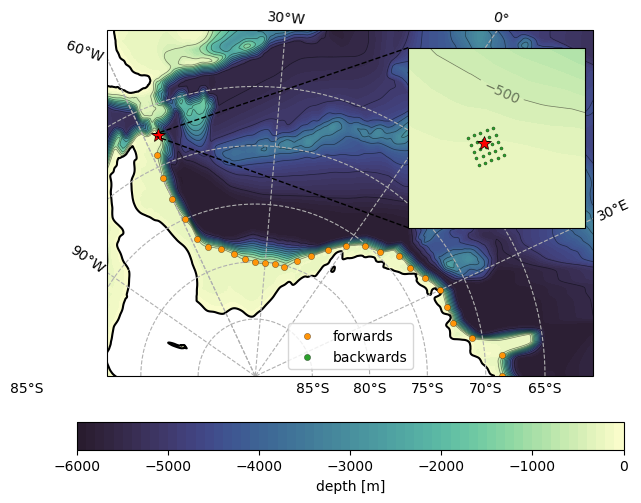

In [31]:
### Setup figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=-35)}, figsize=(15,6))
ax.set_extent([-60,40,-90,-60], ccrs.PlateCarree())

gl0 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl0.xlocator = mticker.FixedLocator(np.arange(-60,35,30))
gl0.ylocator = mticker.FixedLocator([])
gl0.right_labels = True
gl0.bottom_labels = False
gl0.left_labels = True
gl0.top_labels = True

gl1 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl1.xlocator = mticker.FixedLocator(np.arange(-90,-55,30))
gl1.ylocator = mticker.FixedLocator([])
gl1.right_labels = False
gl1.bottom_labels = False
gl1.left_labels = True
gl1.top_labels = False

gl2 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl2.xlocator = mticker.FixedLocator([])
gl2.ylocator = mticker.FixedLocator(np.arange(-70,-64,5))
gl2.right_labels = False
gl2.bottom_labels = True
gl2.left_labels = False
gl2.top_labels = False
gl2.ylabel_style = {'rotation':0}

gl3 = ax.gridlines(linestyle='--', draw_labels=True, x_inline=False, y_inline=False, crs=ccrs.PlateCarree())
gl3.xlocator = mticker.FixedLocator([])
gl3.ylocator = mticker.FixedLocator(np.arange(-90,-74,5))
gl3.right_labels = False
gl3.bottom_labels = True
gl3.left_labels = False
gl3.top_labels = False
gl3.ylabel_style = {'rotation':0}


### Plot main figure
# Coastlines
ax.contour(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=[0], transform=ccrs.PlateCarree(), colors='k')
ax.contour(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=[0], transform=ccrs.PlateCarree(), colors='k')

# Bathymetry
im = ax.contourf(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=range(-6000,1,100),
                 cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
im = ax.contourf(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=range(-6000,1,100),
                 cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
ax.contour(lonsg[:800,:], latsg[:800,:], varg[:800,:], levels=range(-6000,1,500), linewidths=0.5, alpha=0.5,
           colors='k', linestyles='-', transform=ccrs.PlateCarree())
ax.contour(lonsl[:780,:1400], latsl[:780,:1400], varl[:780,:1400], levels=range(-6000,1,500), linewidths=0.5, alpha=0.5,
           colors='k', linestyles='-', transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', shrink=0.47, label='depth [m]',
                    ticks=[-6000,-5000,-4000,-3000,-2000,-1000,0], pad=.1)

# Release locations
ax.scatter(lons_fw, lats_fw, transform=ccrs.PlateCarree(), color='xkcd:tangerine', zorder=10, label='forwards',
           s=20, edgecolor='k', linewidths=0.2)
ax.scatter(lons_bw, lats_bw, transform=ccrs.PlateCarree(), color='tab:green', zorder=10, label='backwards',
           s=20, edgecolor='k', linewidths=0.2)

# ODP Site 696
ax.plot(x696_le, y696_le, color='red', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5,
        transform=ccrs.PlateCarree(), zorder=15)


### Create an inset
sub_ax = fig.add_axes([0.55, 0.55, 0.12, 0.3], projection=ccrs.SouthPolarStereo(central_longitude=-35))
sub_ax.set_extent([-57.2,-56.7,-67.6,-67.4], ccrs.PlateCarree())
# Coastlines
sub_ax.contour(lonsg[405:415,275:285], latsg[405:415,275:285], varg[405:415,275:285], levels=[0], transform=ccrs.PlateCarree(), colors='k')
# Bathymetry
im = sub_ax.contourf(lonsg[405:417,275:290], latsg[405:417,275:290], varg[405:417,275:290], levels=range(-6000,1,100),
                     cmap=cmo.cm.deep_r, transform=ccrs.PlateCarree())
lc = sub_ax.contour(lonsg[405:415,275:285], latsg[405:415,275:285], varg[405:415,275:285],
                    levels=range(-6000,1,500), linewidths=0.5, alpha=0.5, colors='k', linestyles='-', transform=ccrs.PlateCarree())
sub_ax.clabel(lc, levels=[-500], inline=True)
# Release locations
sub_ax.scatter(lons_bw, lats_bw, color='tab:green', marker='.', s=20, transform=ccrs.PlateCarree(), zorder=10, edgecolor='k', linewidths=0.2)
# ODP Site 696
sub_ax.plot(x696_le, y696_le, color='red', marker='*', markersize=10, markeredgecolor='black', markeredgewidth=.5, transform=ccrs.PlateCarree(), zorder=15)

### Draw lines to inset
axes = mark_inset(ax, sub_ax, loc1=2, loc2=3, edgecolor='k', linestyle='dashed', linewidth=1, zorder=10)

ax.legend(loc='lower center')
plt.draw()

### Fix coordinate labels
for i, ea in enumerate(gl3.label_artists):
    if '-' in str(ea[2]):
        pos = gl3.label_artists[i+1][2].get_position()
        if i == 4:
            ea[2].set_position([-1.2*pos[0], pos[1]])
        if i == 2:
            ea[2].set_position([-2*pos[0], pos[1]])
        if i == 0:
            ea[2].set_position([-4*pos[0], pos[1]])
    if '-' not in str(ea[2]):
        pos = ea[2].get_position()
        ea[2].set_position([pos[0], pos[1]])

plt.show()